# How to beep

### Created by Helmer Barcos - https://barcos.co - helmer@barcos.co

### But first lets build a metronom

https://ritza.co/articles/note-generator-article/

In [38]:
pip install simpleaudio numpy

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import simpleaudio
import numpy
import random
import time

def wait(delay):
    end_time = time.time() + delay
    while end_time > time.time():
        continue

def metronome(bpm):
    # print(float(bpm), "bpm")
    delay = 60/bpm
    count = 0
    beat = 0

    mode = 4
    multiple = 8

    while True:
        try:
            wait(delay)

            # increment count after every wait and beat after ever 4 counts 
            count += 1
            if count > mode:
                count = 1
                beat += 1

            # set metronome audio according to beat count
            wave_obj = simpleaudio.WaveObject.from_wave_file('metronome.wav')
            if count == 1:
                wave_obj = simpleaudio.WaveObject.from_wave_file('metronomeup.wav')

            # play metronome audio
            play_obj = wave_obj.play()
            play_obj

            # Remove this after testing
            # print(beat, count)
        except KeyboardInterrupt:
            break

## Tets the metronome

In [7]:
metronome(95)

## Linear intensity mapped to a distance

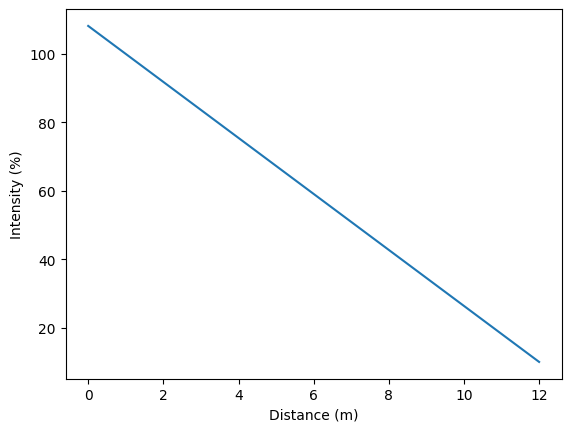

In [56]:
import matplotlib.pyplot as plt

def intensity_value_linear(distance):
    # intensity = 100 - (distance/12)*100
    mindistance = 1
    maxDistance = 12
    intensity = 100 - (distance - mindistance) * (90/(maxDistance - mindistance))
    return intensity

# create a list of distances from 0 to 12
distances = list(range(0, 13))

# use the intensity_value function to calculate the intensity for each distance
intensities = [intensity_value_linear(d) for d in distances]

# create a line plot of intensity vs distance
plt.plot(distances, intensities)

# add axis labels
plt.xlabel('Distance (m)')
plt.ylabel('Intensity (%)')

# show the plot
plt.show()

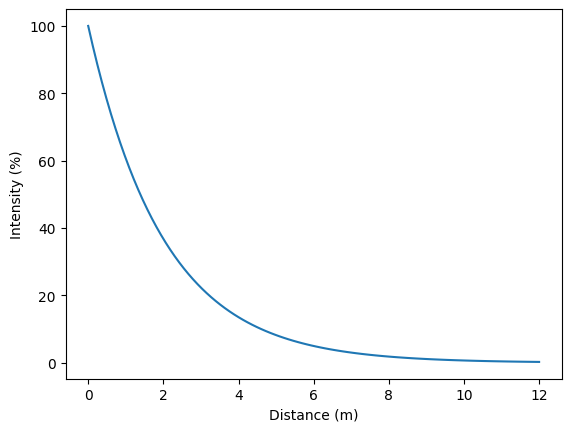

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def intensity_value(distance):
    intensity = np.exp(-distance/2) * 100
    return intensity

distances = np.linspace(0, 12, 100) # create a list of distances from 0 to 12
intensities = [intensity_value(d) for d in distances]

plt.plot(distances, intensities)
plt.xlabel('Distance (m)')
plt.ylabel('Intensity (%)')
plt.show()

Here's an example of a function that calculates the repetition interval based on an intensity value, </br>
where a higher intensity value results in a shorter repetition interval, with a maximum of 5 seconds </br>
and a pronounced curve as the intensity increases:

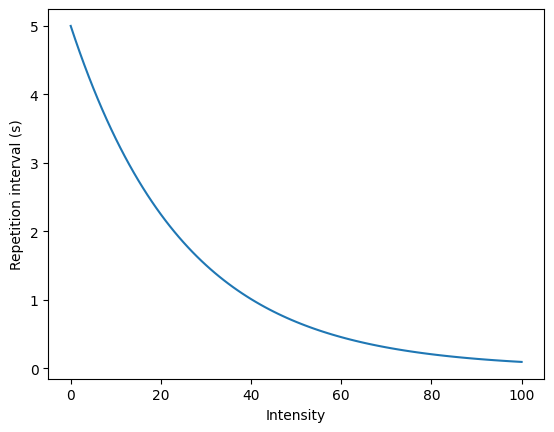

In [68]:
import matplotlib.pyplot as plt
import math

def intensity_to_interval(intensity):
    if intensity <= 0:
        return 5
    else:
        return 5 - (5 * (1 - math.exp(-intensity / 25)))

intensity_values = range(0, 101)
interval_values = [intensity_to_interval(intensity) for intensity in intensity_values]

plt.plot(intensity_values, interval_values)
plt.xlabel('Intensity')
plt.ylabel('Repetition interval (s)')
plt.show()


This function uses the exponential function math.exp() to calculate the repetition interval. </br>
The math.exp() function raises the mathematical constant e (approximately 2.718) to a power, </br>
in this case, the -intensity / 25 power.</br>

The value of 25 in this function is an arbitrary value that controls the steepness of the </br>
curve, you can adjust this value to get the desired behavior. The intensity is divided by </br>
25 so the curve starts at 0, otherwise, the curve starts at a high value.</br>

The math.exp() function returns a value between 0 and 1, which is then multiplied by 5 to </br>
get a value between 0 and 5. And then 5 is subtracted to obtain the final value of the </br>
repetition interval.</br>

This function will make the repetition interval decrease quickly as the intensity increases,</br>
reaching its lowest value of 0 seconds when the intensity is high. Please note that this is </br>
just an example, and you may need to adjust it based on your specific requirements.</br>

# Final test 

## 12M

In [29]:
# change if you need to test differents distance
distance = 11

desired_intensity = intensity_value(distance)
interval = intensity_to_interval(desired_intensity)
bpm = (1/interval)*60
print("A distance={}m | intesity={}% | bmp={} | sleepfunct={}s".format(distance ,desired_intensity, bpm, interval))
metronome(bpm=bpm)

A distance=11m | intesity=0.40867714384640663% | bmp=12.09848444967387 | sleepfunct=4.959298848511342s


## 10M

In [30]:
# change if you need to test differents distance
distance = 10

desired_intensity = intensity_value(distance)
interval = intensity_to_interval(desired_intensity)
bpm = (1/interval)*60
print("A distance={}m | intesity={}% | bmp={} | sleepfunct={}s".format(distance ,desired_intensity, bpm, interval))
metronome(bpm=bpm)

A distance=10m | intesity=0.6737946999085467% | bmp=12.16280523726325 | sleepfunct=4.933072496810003s


## 8M

In [33]:
# change if you need to test differents distance
distance = 8

desired_intensity = intensity_value(distance)
interval = intensity_to_interval(desired_intensity)
bpm = (1/interval)*60
print("A distance={}m | intesity={}% | bmp={} | sleepfunct={}s".format(distance ,desired_intensity, bpm, interval))
metronome(bpm=bpm)

A distance=8m | intesity=1.8315638888734178% | bmp=12.447725650714503 | sleepfunct=4.82015764836173s


## xM

In [78]:
# change if you need to test differents distance
distance = 1

desired_intensity = intensity_value_linear(distance)
interval = intensity_to_interval(desired_intensity)
bpm = (1/interval)*60
print("A distance={}m | intesity={}% | bmp={} | sleepfunct={}s".format(distance ,desired_intensity, bpm, interval))
metronome(bpm=bpm)

A distance=1m | intesity=100.0% | bmp=655.1778003977294 | sleepfunct=0.0915781944436711s
